# PLUMBER land surface model comparison project
The Protocol for the Analysis of Land Surface Models (PALS) Land Surface Model Benchmarking Evaluation Project (PLUMBER) was designed to be a land surface model (LSM) benchmarking intercomparison (Best et al., 2015). Thirteen Land Surface Models were compared across 20 different sites across the world (Figure and Table below from Best et al., 2015).

The PLUMBER experiment showed **that** models behave differently and created a motivation to find out **why** models behave differently. In this assignment you will use the Structure for Unifying Multiple Modelling Alternatives (Clark et al., 2015a, b) to investigate modelling decisions related to canopy processes and make a few steps towards answering the why-question.

<div>
<img src="./img/plumber_figure.png" width="750"/>
</div>

<div>
<img src="./img/plumber_table.png" width="750"/>
</div>

## References
Best, M.J., Abramowitz, G., Johnson, H.R., Pitman, A.J., Balsamo, G., Boone, A., Cuntz, M., Decharme, B., Dirmeyer, P.A., Dong, J. and Ek, M., 2015. The plumbing of land surface models: benchmarking model performance. Journal of Hydrometeorology, 16(3), pp.1425-1442.

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Rasmussen, R. M. (2015a). A unified approach for process-based hydrologic modeling: 1. Modeling concept. Water Resources Research, 51(4), 2498–2514. https://doi.org/10.1002/2015WR017198

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Marks, D. G. (2015b). A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies. Water Resources Research, 51, 2515–2542. https://doi.org/10.1002/2015WR017200

Clark, M. P., Zolfaghari, R., Green, K. R., Trim, S., Knoben, W. J. M., Bennet, A., Nijssen, B., Ireson, A. and Spiteri, R. J. (under review). Laugh tests for land models. Submitted to Journal of Hydrometerology, 2020.

<br>

## Model setup
We'll first load the required modules.

In [2]:
# modules 
import os
import pysumma as ps
import xarray as xr
import matplotlib.pyplot as plt

<br>

Prof. Clark has created three PLUMBER-specific lookup tables for question 4 of this exercise. These bear the names `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` respectively, Due to the experiment-specific nature of the `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` lookup tables, we'll need to notify pysumma that these lookup tables are available. Run the code below to do this.

In [3]:
# Update the Lookup table decision
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberCABLE')
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberCHTESSEL')
ps.decisions.DECISION_META['vegeParTbl']['options'].append('plumberSUMMA')

<br>

Now we can setup a pysumma simulation object. We'll abitrarily select the Amplero PLUMBER site as our default simulation.

In [4]:
# SUMMA.exe location
executable = '/usr/local/bin/summa.exe'

In [5]:
# Define location of .exe and file manager
file_manager_constant = './settings/plumber/Amplero/summa_zFileManager_Amplero.txt'

In [6]:
# Open pysumma simulation object
s_amplero = ps.Simulation(executable, file_manager_constant)

In [7]:
# Make the output directory if it doesn't exist
if not os.path.exists(s_amplero.manager['outputPath'].value):
    os.makedirs(s_amplero.manager['outputPath'].value)

<br>

## Assignment - subjective decisions in canopy processes
The image below is reproduced from Fig. 1 in Clark et al. (under review). The image shows the mass (blue) and energy (red) fluxes in the canopy and the canopy air space. The representation of these fluxes in process-based models is part of the many decisions a modeller makes. In this assigment you will investigate the impact of some of these decisions on the simulations for one or more PLUMBER sites.

<div>
<img src="./img/canopy_fluxes.png" width="750"/>
</div>

### Note on pysumma
In the following, you are asked to change certain values in your pysumma setup. Keep in mind that if you make these changes in the input files in the `settings` folder, you will need to make a new pysumma simulation object to have these changes take effect (`s_amplero = ps.Simulation(executable, file_manager_constant)`). If you instead make the changes to an existing pysumma simulation object, make sure to reset your pysumma simulation object to its base state after each simulation (`s_amplero.reset()`) so that your changes don't accumulate. 

### Note on finding simulated variables
In the following exercises, you are asked to investigate the impact of certain modelling options on model simulations.
Time series of certain simulated variables can be found in the output `.nc` file. You can find the location and name of the output `.nc` file by checking the `manager` option of your pysumma object (e.g. `print(s_amplero.manager)`). 

Interesting variables to investigate are indicated in each exercise. If you want to assess the impact on other simulations variables, you can either select those from the output `.nc` file that gets generated by default, or you can adapt the `Model_Output.txt` file in the `./settings/reynolds/` folder. Re-create your pysumma object afterwards to process changes to the `.txt`! See the SUMMA documentation for further guidance: https://summa.readthedocs.io/en/latest/input_output/SUMMA_input/#output-control-file

<br>

<br>

## Exercise 1: Canopy transmissivity
The canopy can block incoming shortwave radiation (Qswd) from reaching the land surface. Transmission and attentuation of incoming shortwave radiation is controlled by the parametrization chosen to represent this process and the Leaf Area Index of the canopy. We'll focus on the parametrization choice for this assignment. This modelling decision is called `canopySrad` in the SUMMA decision file. 

Use your knowledge of pysumma to:

- Find out what the available parametrizations for `canopySrad` are
- Remove option `noah_mp` because it does not compute our variable of interest
- Run the simulations for your chosen PLUMBER site with the available parametrizations
- Make a graph to show the differences in simulated below canopy shortwave radiation (`scalarBelowCanopySolar`) and comment on the sensitivities. You can compare this with eastimated incoming shortwave radiation above the canopy for referece - this information is stored in the model forcing data as variable `SWRadAtm` but for convenience also generated as part of the SUMMA outputs for this experiment

As an example for the remainder of this exercise, code to run the required simulations for Exercise 1 is provided below. All that's left to complete this exercise is to run the code blocks below and to comment on the differences in snow depth simulation you see. 

#### Exercise 1: Answers

In [8]:
# Find the parametrizations
decision = 'canopySrad'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['noah_mp', 'CLM_2stream', 'UEB_2stream', 'NL_scatter', 'BeersLaw']


In [9]:
# The 'naoh_mp' parametrization option does not compute our variable of interest, `scalarBelowCanopySolar`, so there's no need to include it in the tests
parametrizations.remove('noah_mp')
print(parametrizations)

['CLM_2stream', 'UEB_2stream', 'NL_scatter', 'BeersLaw']


In [10]:
# Do the simulations
for parametrization in parametrizations:
    
    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # Run the model
    # s_amplero.run('local', run_suffix=decision + '_' + parametrization )

Setting up simulations with parametrization CLM_2stream for canopySrad
Setting up simulations with parametrization UEB_2stream for canopySrad
Setting up simulations with parametrization NL_scatter for canopySrad
Setting up simulations with parametrization BeersLaw for canopySrad


In [11]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__canopySrad_CLM_2stream_timestep.nc',
    './output/plumber/Amplero/Amplero__canopySrad_UEB_2stream_timestep.nc',
    './output/plumber/Amplero/Amplero__canopySrad_NL_scatter_timestep.nc',
    './output/plumber/Amplero/Amplero__canopySrad_BeersLaw_timestep.nc']

In [12]:
# define a plotting function that collects a bunch of commands that need to be repeated to get each simulation into the plot
def aux_plot_1(files,labels):
    
    idx = -1 # label counter
    
    for file in files:
        
        # Increment counter
        idx +=1
        
        # load data
        ds = xr.open_dataset(file).isel(hru=0, gru=0).load() # pre-select the single hru and gru that are within the data
        
        # Plot the observations of first file
        if idx == 0:
            ds['SWRadAtm'].plot(color='k',label='Above canopy forcing')
        
        # Plot data 
        ds['scalarBelowCanopySolar'].plot(label=labels[idx])

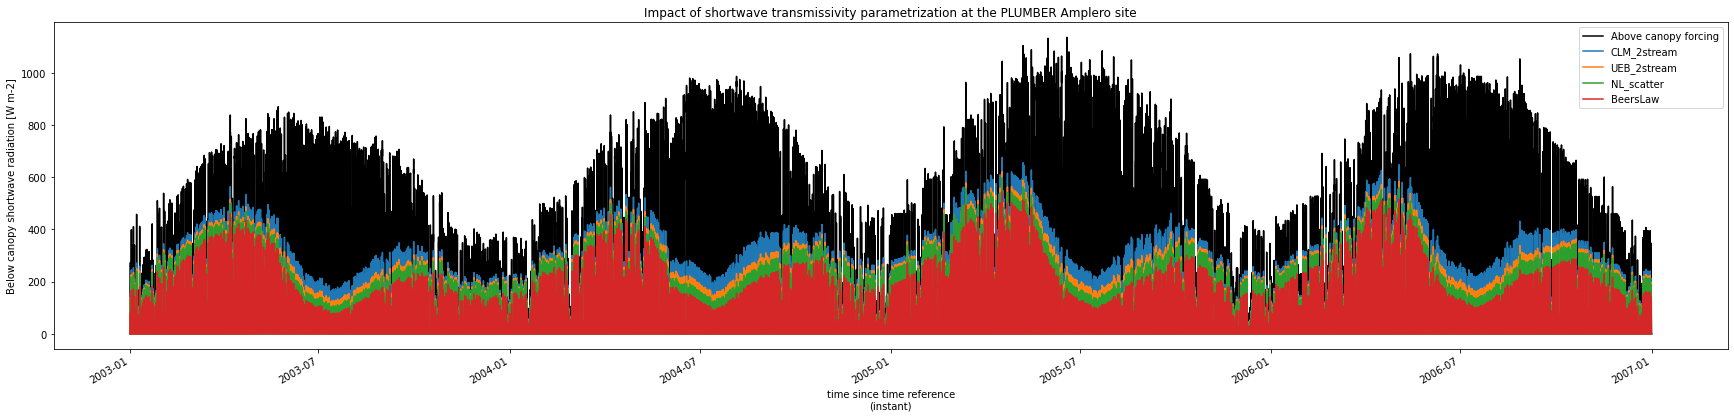

In [13]:
# make the plot
plt.figure(figsize=(30,6))
aux_plot_1(output_files,parametrizations)
plt.legend()
plt.title('Impact of shortwave transmissivity parametrization at the PLUMBER Amplero site')
plt.ylabel('Below canopy shortwave radiation [W m-2]');

Overall the parameterizations appear to produce realistic predictions of below canopy shortwave irradiance which is about 20-50% of SW radiation incident to the top of the canopy. The difference in shortwave radiation that reaches below canopy is shown above using the CLM_2stream, UEB_2stream, NL_scatter, and BeersLaw parameterizations. The highest predicted subcanopy SW is by the CLM parameterization followed by UEB, NL and beers law. All four parameterizations generally predict the same timing and seasonality of SW irradiance however they differ in the magnitude that reaches the subcanopy. The percent difference between the min and max predicted SW irradiance is about 20% in winter and spring and seems to go up in the fall to about 40%. There is a greater variability in the four parameterizations in the fall compared to spring consistently across all years. This could be due to a greater sensitivity of the CLM, UEB and NL parameterizaitons to LAI as trees loose their leaves in the fall if this is a deciduous forest. 

<br>
<br>

## Exercise 2: Precipitation partitioning
Precipitation partitioning between canopy interception and throughfall is determined by both the canopy wetting function and the canopy interception capacity. The canopy wetting function is a modelling decision called `cIntercept`. SUMMA lists three options here, but only two are currently implemented. Canopy storage is controlled by parameters `refInterceptCapRain` and `refInterceptCapSnow`:

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| refInterceptCapSnow       |       6.6000 |       1.0000 |      10.0000 | kg m-2 | canopy interception capacity per unit leaf area (snow)
| refInterceptCapRain       |       1.0000 |       0.0100 |       1.0000 | kg m-2 | canopy interception capacity per unit leaf area (rain)

Use your knowledge of pysumma to:
- Find out what the available parametrizations for `cIntercept` are
- Do not use parametrization `notPopulatedYet`, for obvious reasons
- Run the simulations for the Amplero site with the other two parametrizations
- Repeat this with several different values for `refInterceptCapRain` and `refInterceptCapSnow`
- Make graphs to show the differences in simulated evaporation (`scalarCanopyEvaporation`) and transpiration (`scalarCanopyTranspiration`), and the difference in simulated throughfall of rain (`scalarThroughfallRain`) and snow (`scalarThroughfallSnow`). Comment on what you see

### Find out what the available parametrizations for `cIntercept` are

In [14]:
# Find the parametrizations
decision = 'cIntercept'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['sparseCanopy', 'storageFunc', 'notPopulatedYet']


### Do not use parametrization `notPopulatedYet`, for obvious reasons

In [15]:
# The 'naoh_mp' parametrization option does not compute our variable of interest, `scalarBelowCanopySolar`, so there's no need to include it in the tests
parametrizations.remove('notPopulatedYet')
print(parametrizations)

['sparseCanopy', 'storageFunc']


### Run the simulations for the Amplero site with the other two parametrizations

In [16]:
# Do the simulations
# for parametrization in parametrizations:
    
#     # Print what we're doing
#     print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
#     # reset the simulation
#     s_amplero.reset()
    
#     # Set the model decision
#     s_amplero.decisions[decision] = parametrization
    
#     # Run the model
#     s_amplero.run('local', run_suffix=decision + '_' + parametrization )

In [31]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_timestep.nc']


In [32]:
# define a plotting function that collects a bunch of commands that need to be repeated to get each simulation into the plot
def aux_plot_1(files,labels,param, start_date, end_date):
    
    idx = -1 # label counter
    
    for file in files:
        
        # Increment counter
        idx +=1
        
        # load data
        ds = xr.open_dataset(file).isel(hru=0, gru=0).load() # pre-select the single hru and gru that are within the data
        
        # Plot the observations of first file
        # if idx == 0:
        #     ds['scalarCanopyEvaporation'].plot(color='k',label='Above canopy forcing')
        
        # Specify the marker
        if 'storageFunc' in file:
            marker = 'o'
        else:
            marker = 'v'
        
        # Plot data 
        ds[param].loc[start_date:end_date].plot(label=labels[idx], marker=marker, linestyle='None')
        # ds[param].loc['2004-1-1':'2004-2-1'].plot(label=labels[idx], marker='o', linestyle='None')
        # ds[param].plot(label=labels[idx], marker='o', linestyle='None')

In [ ]:
### Lets look at just the influence of model decision aka parameterization on the canopy fluxes

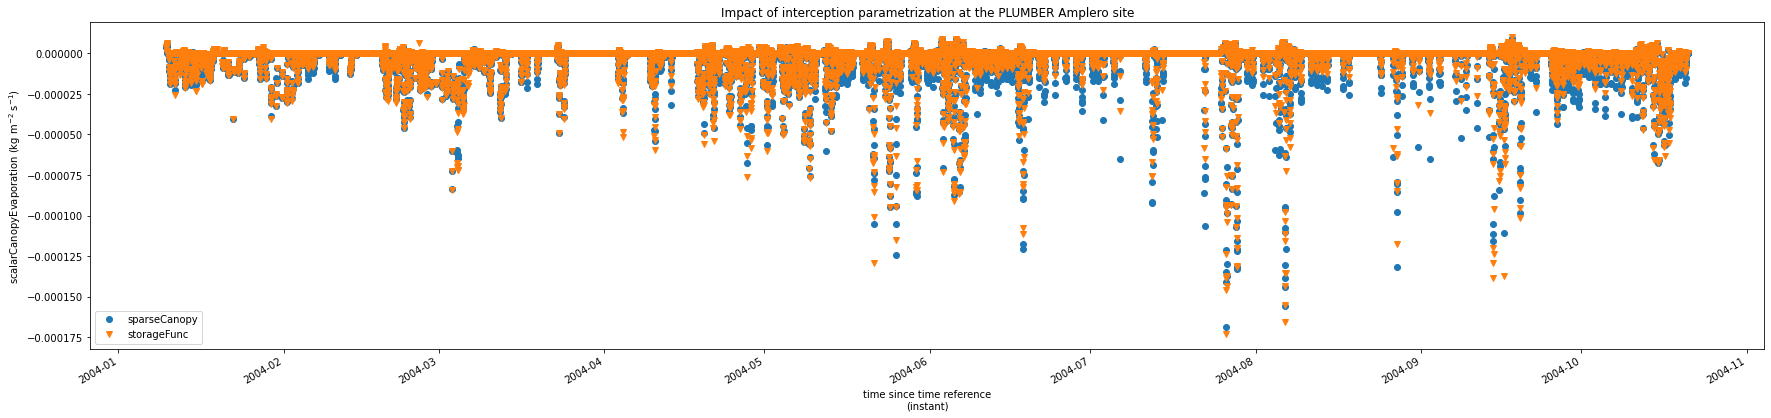

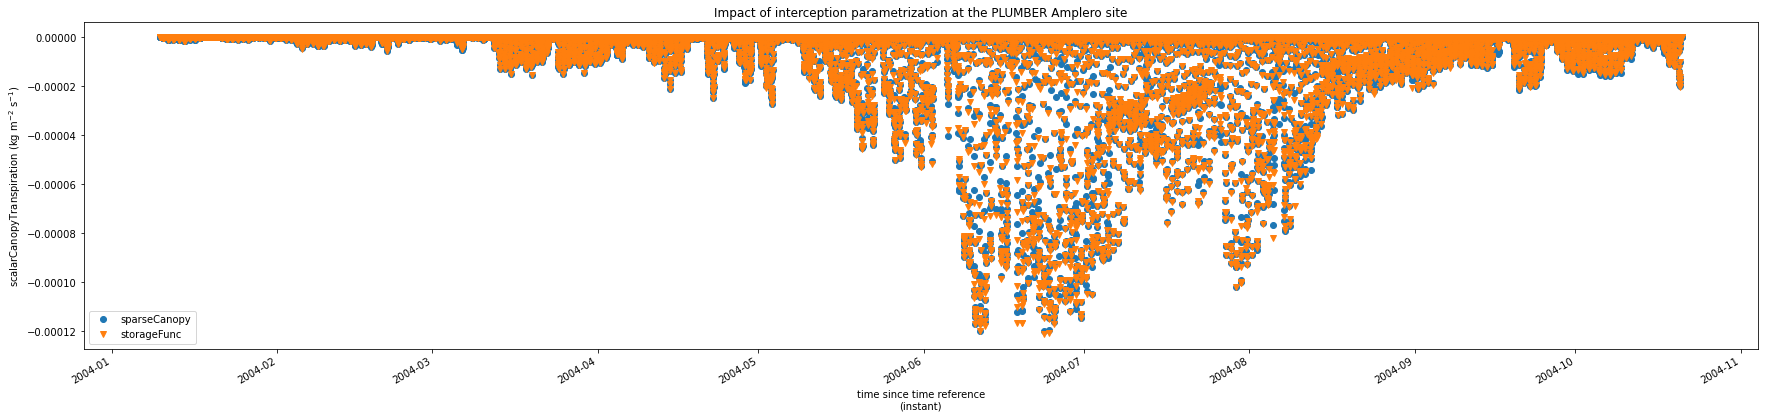

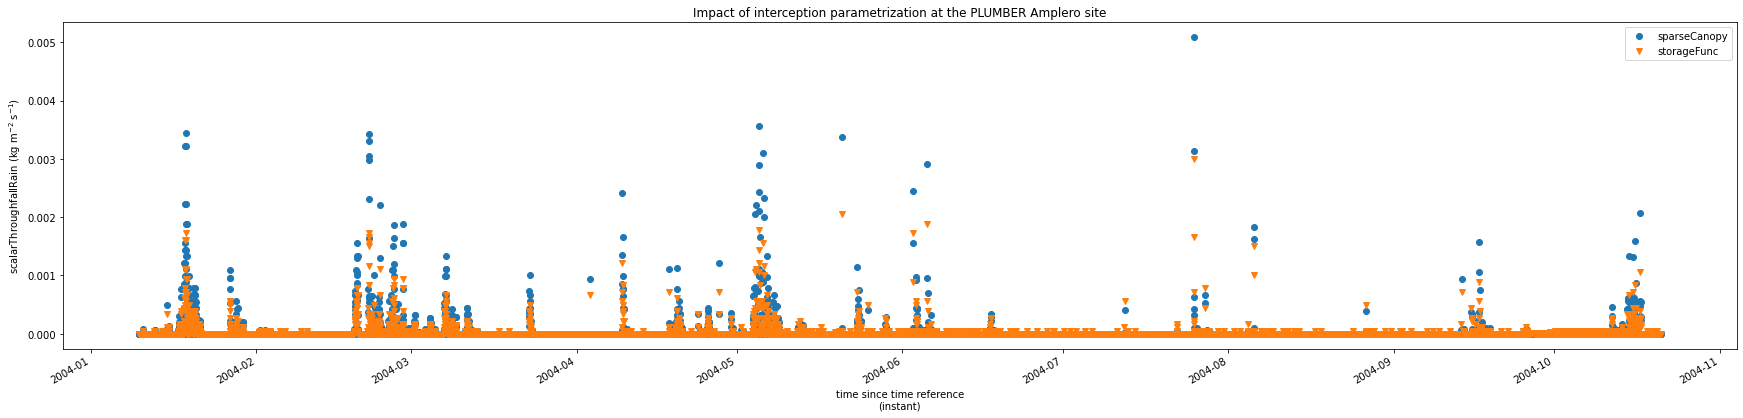

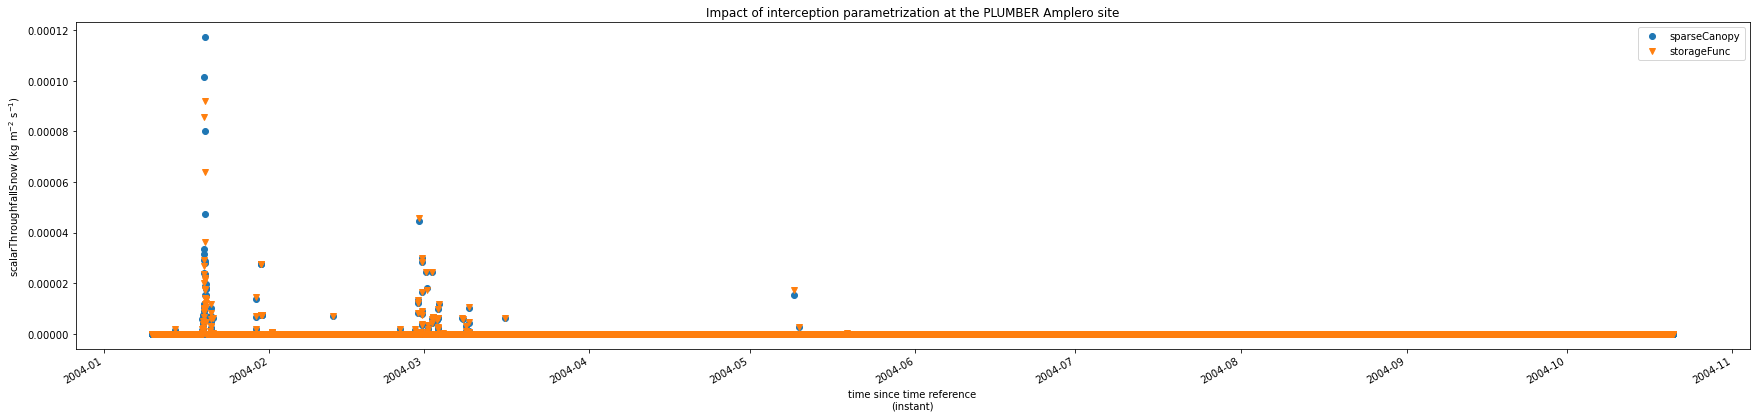

In [33]:
# make the plot
select_params = ['scalarCanopyEvaporation', 'scalarCanopyTranspiration', 'scalarThroughfallRain', 'scalarThroughfallSnow']

# aux_plot_1(output_files1,'0.01', 'scalarThroughfallRain')
# aux_plot_1(output_files,labels, 'scalarThroughfallRain', '2004-1-1', '2004-2-1')

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,parametrizations, p, '2004-1-10', '2004-10-20')
    plt.legend()
    plt.title('Impact of interception parametrization at the PLUMBER Amplero site')
    plt.ylabel(p + ' (kg m$^{-2}$ s$^{-1}$)');
    
# storage function is where interception is a function of storage in the canopy, so as the canopy fills up with rain we get more throughfall / less interception 
# with sparse canopy interception is represented as a fraction

### Repeat this with several different values for refInterceptCapRain and refInterceptCapSnow

In [31]:
# Find the default parameter values
cIntercept_pars = ['refInterceptCapRain','refInterceptCapSnow']

# Print it
print('old: ' + str(s_amplero.global_hru_params[cIntercept_pars[0]]))

print('old: ' + str(s_amplero.global_hru_params[cIntercept_pars[1]]))

# Save the upper and lower bounds as variables to create a sequence of params to loop through

refInterceptCapRainMin = 0.0100 # lower param limit
refInterceptCapRainMax = 1.0 # upper param limit

refInterceptCapSnowMin = 1.0 # low param limit
refInterceptCapSnowMax = 10.0 # upper param limit

# create a sequence of rain params to loop through later

rain_cap_sequence = [refInterceptCapRainMin, 0.26, 0.51, 0.76, refInterceptCapRainMax]
# rain_cap_sequence = [refInterceptCapRainMin, refInterceptCapRainMax]

snow_cap_sequence = range(1,11)

# for r in rain_cap_sequence:
#     print(r)
    
# for s in snow_cap_sequence:
#     print(s)

# Change the value
# s_amplero.global_hru_params[cIntercept_pars[0]] = 0.3
# print('new: ' + str(s_amplero.global_hru_params[cIntercept_pars[0]]))


old: refInterceptCapRain       |       1.0000 |       0.0100 |       1.0000
old: refInterceptCapSnow       |       6.6000 |       1.0000 |      10.0000


In [ ]:
# Do the simulations changing only the rain capacity parameter and the parameterization

# for rain_cap_parameter in rain_cap_sequence:
#     # reset the simulation
#     s_amplero.reset()
    
#     s_amplero.global_hru_params[cIntercept_pars[0]] = rain_cap_parameter
#     print('new: ' + str(s_amplero.global_hru_params[cIntercept_pars[0]]))

#     for parametrization in parametrizations:

#         # Print what we're doing
#         print('Setting up simulations with parametrization ' + parametrization + ' and rain capacity parameter ' + str(rain_cap_parameter) + ' for ' + decision)

#         # Set the model decision
#         s_amplero.decisions[decision] = parametrization

#         # Run the model
#         s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_' + 'rain_par' + str(rain_cap_parameter))

### Plot the rain parameter sensitivity using both the storageFunc (sf) and sparseCanopy (sc) parameterizations

In [22]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_rain_par0.26_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_rain_par0.51_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_rain_par0.76_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_rain_par1.0_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par0.26_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par0.51_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par0.76_timestep.nc',
        './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par1.0_timestep.nc']

labels = ['0.26_sf', '0.51_sf', '0.76_sf', '1.0_sf', '0.26_sc', '0.51_sc', '0.76_sc', '1.0_sc']


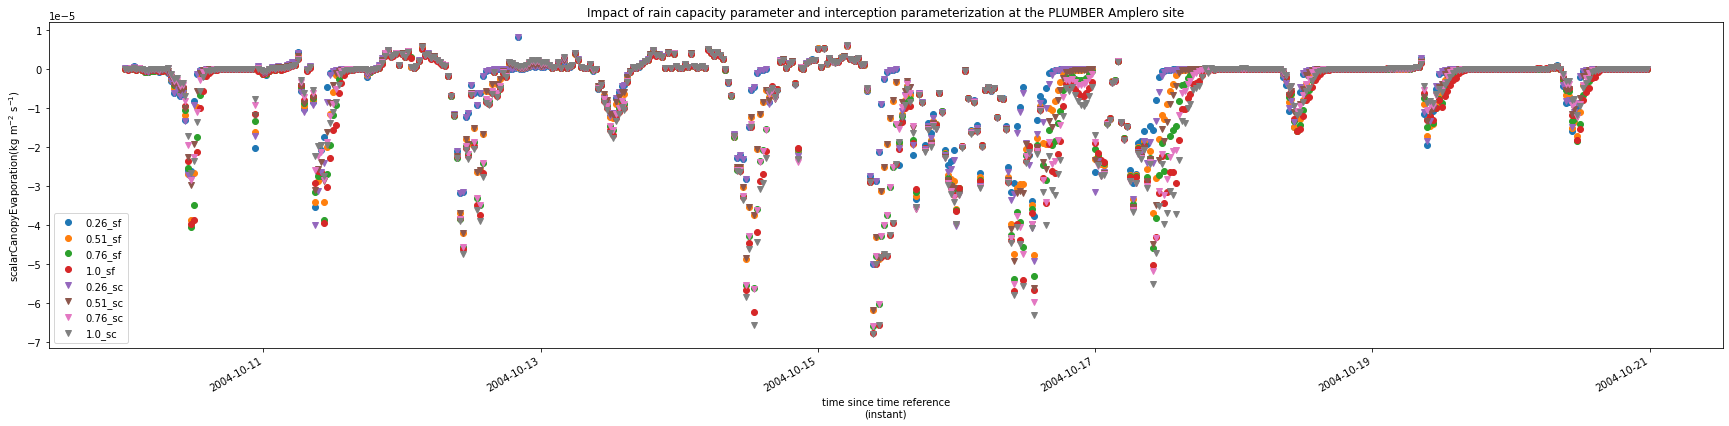

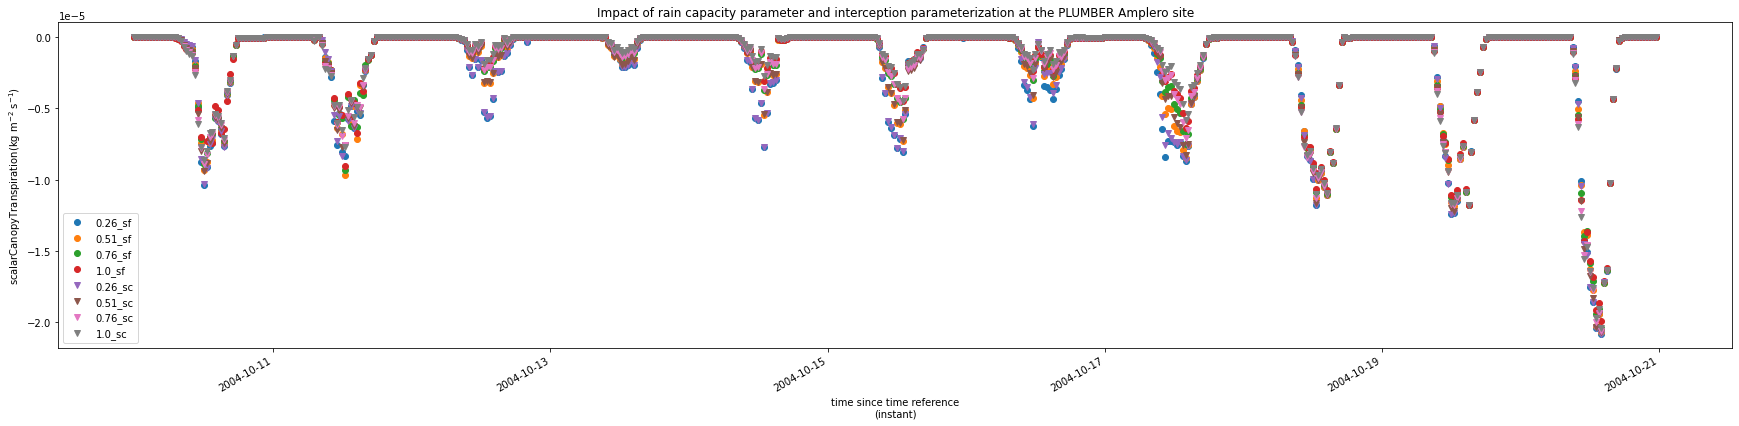

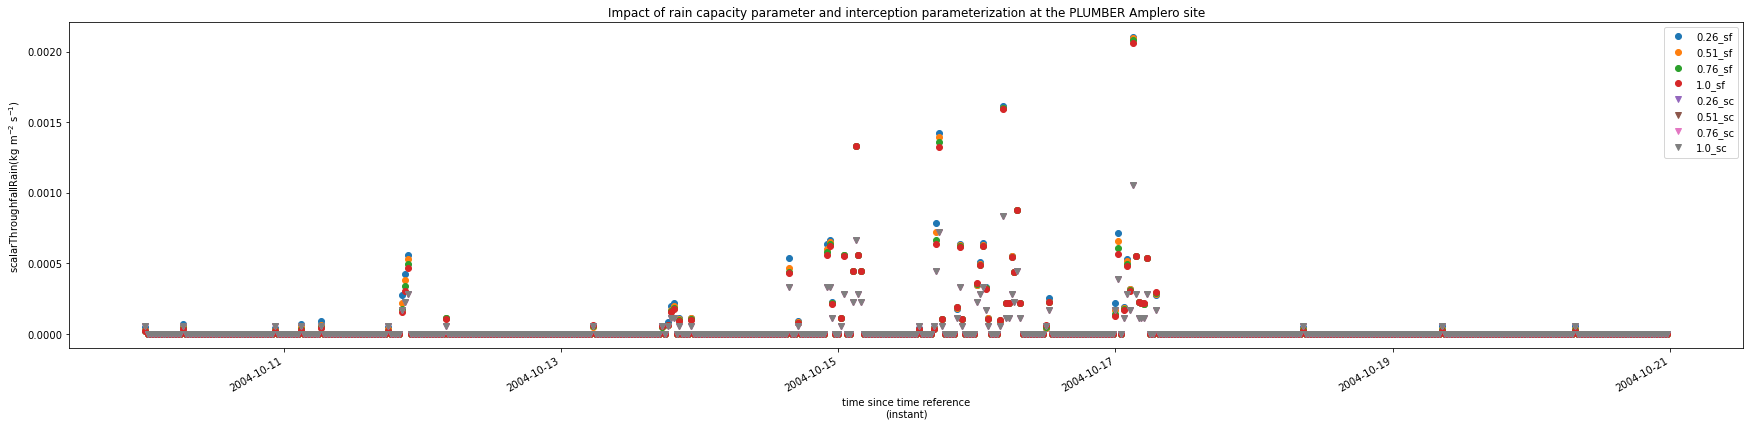

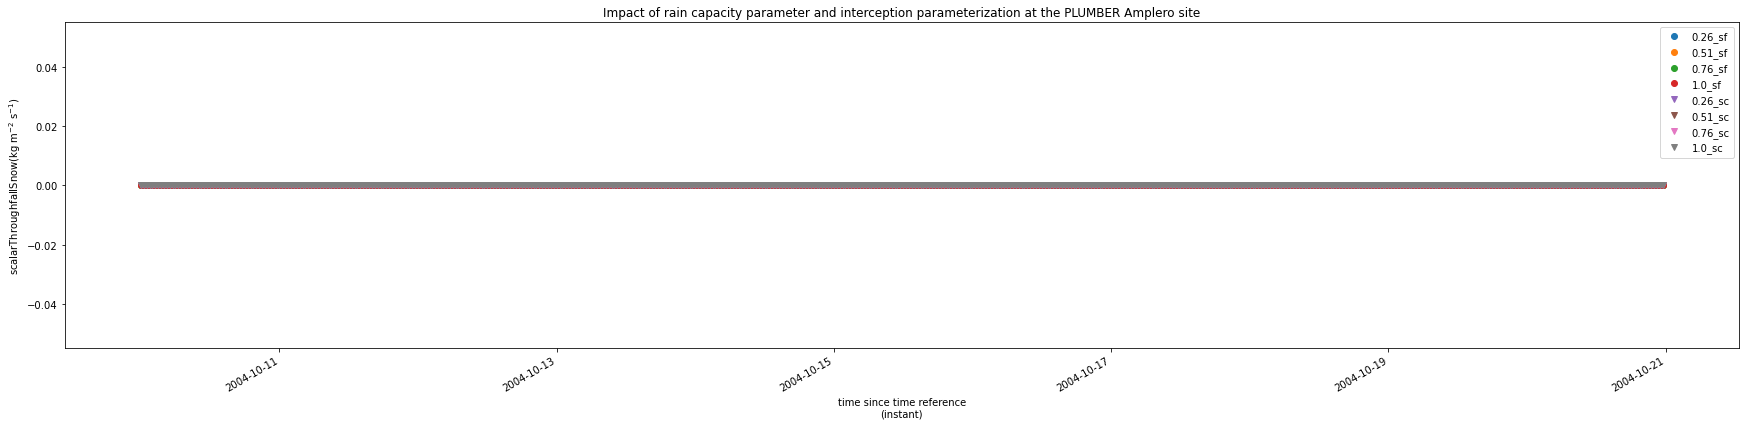

In [23]:
# make the plot
# plt.figure(figsize=(30,6))
# aux_plot_1(output_files,rain_cap_sequence)
# plt.legend()
# plt.title('Impact of rain capacity at the PLUMBER Amplero site')
# plt.ylabel('scalarCanopyEvaporation');

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,labels, p, '2004-10-10', '2004-10-20')
    plt.legend()
    plt.title('Impact of rain capacity parameter and interception parameterization at the PLUMBER Amplero site')
    plt.ylabel(p + ' (kg m$^{-2}$ s$^{-1}$)');

'_sf' refers to the storageFunc parameterization and 'sc' refers to the sparse canopy parameterization. We can see with the storage function parameterization that when the canopy fills up with rain the throughfall increases compared to the sparseCanopy parameterization which remains at a relatively lower throughfall rate. There appears to be no sensitivity of the rain capacity parameter on the rainfall throughfall rate using the sparceCanopy parameterization.

### Now lets plot the effect of the snow storage capacity using the storageFunc and sparseCanopy parameterization

In [50]:
# Do the simulations changing only the snow capacity parameter and the parameterization

# for snow_cap_parameter in snow_cap_sequence:
    
#     # reset the simulation
#     s_amplero.reset()
    
#     s_amplero.global_hru_params[cIntercept_pars[1]] = snow_cap_parameter
#     print('new: ' + str(s_amplero.global_hru_params[cIntercept_pars[1]]))

#     for parametrization in parametrizations:

#         # Print what we're doing
#         print('Setting up simulations with parametrization ' + parametrization + ' and snow capacity parameter ' + str(snow_cap_parameter) + ' for ' + decision)

#         # Set the model decision
#         s_amplero.decisions[decision] = parametrization

#         # Run the model
#         s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_' + 'snow_par' + str(snow_cap_parameter))

new: refInterceptCapSnow       |       1.0000 |       1.0000 |       1.0000
Setting up simulations with parametrization sparseCanopy and snow capacity parameter 1 for cIntercept
Setting up simulations with parametrization storageFunc and snow capacity parameter 1 for cIntercept
new: refInterceptCapSnow       |       2.0000 |       2.0000 |       2.0000
Setting up simulations with parametrization sparseCanopy and snow capacity parameter 2 for cIntercept
Setting up simulations with parametrization storageFunc and snow capacity parameter 2 for cIntercept
new: refInterceptCapSnow       |       3.0000 |       3.0000 |       3.0000
Setting up simulations with parametrization sparseCanopy and snow capacity parameter 3 for cIntercept
Setting up simulations with parametrization storageFunc and snow capacity parameter 3 for cIntercept
new: refInterceptCapSnow       |       4.0000 |       4.0000 |       4.0000
Setting up simulations with parametrization sparseCanopy and snow capacity parameter 4 

In [106]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_snow_par1_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_snow_par5_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_storageFunc_snow_par10_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_snow_par1_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_snow_par5_timestep.nc',
    './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_snow_par10_timestep.nc',
]

labels = ['1_sf', '5_sf', '10_sf', '1_sc', '5_sc', '10_sc']


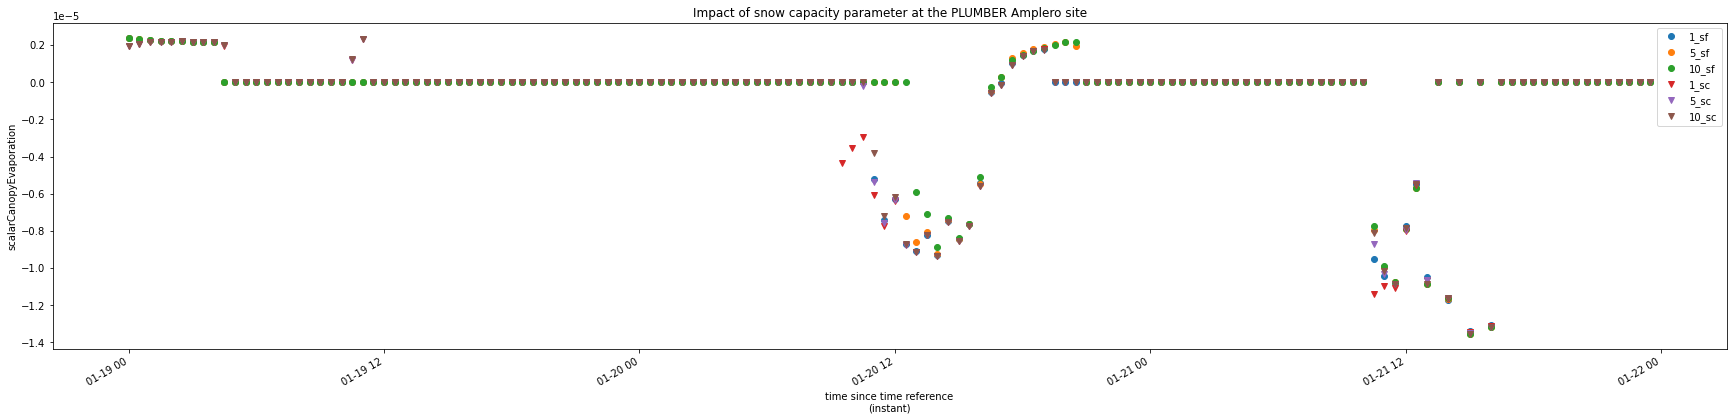

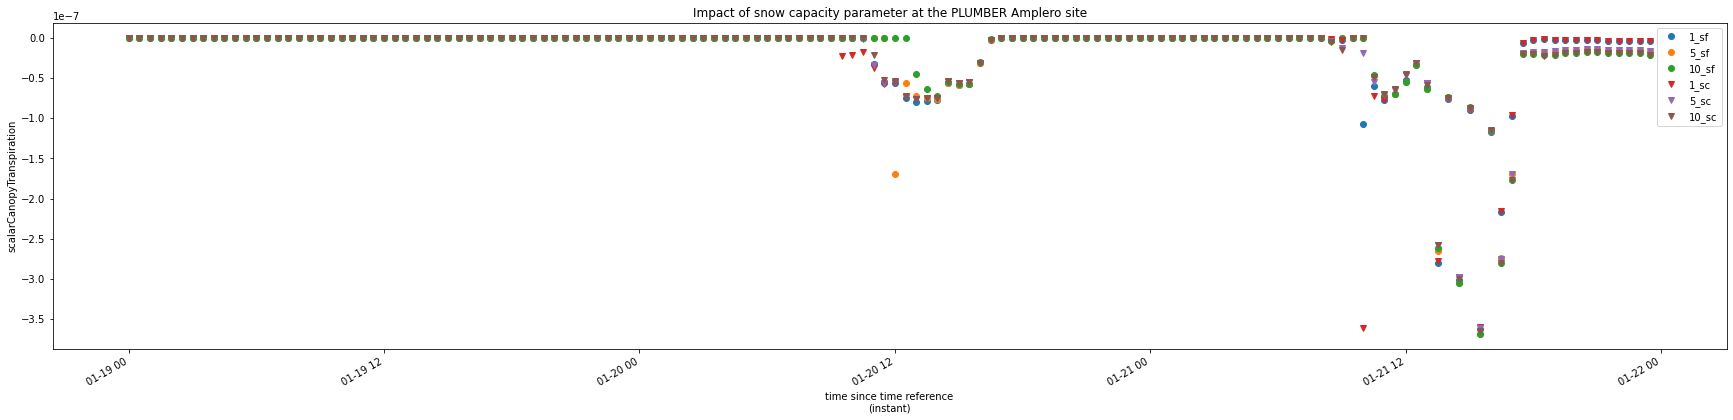

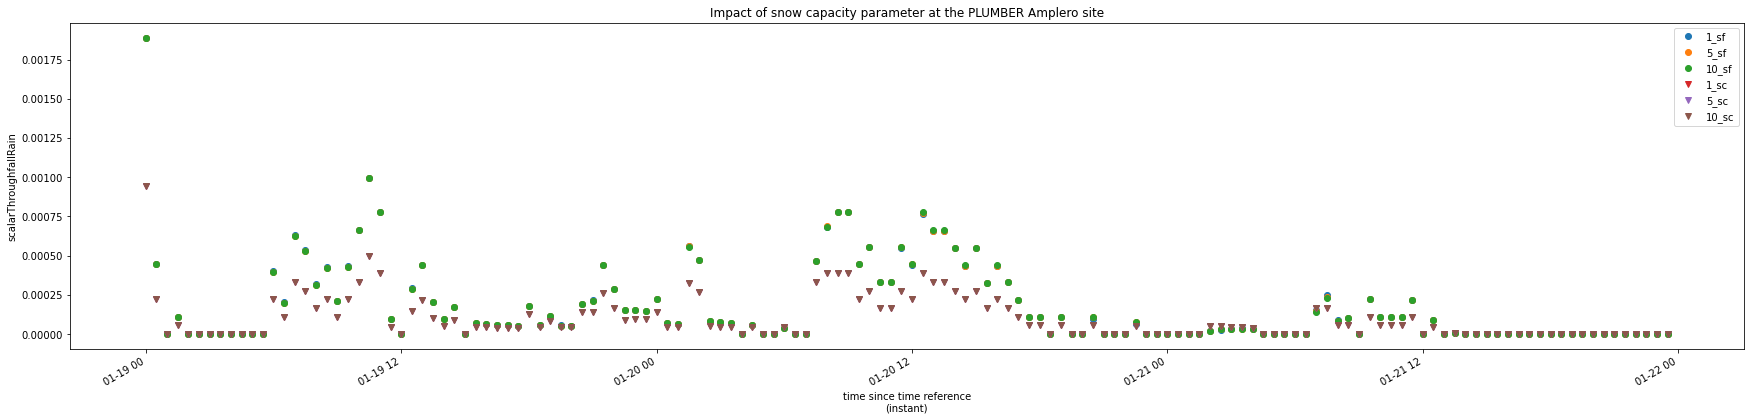

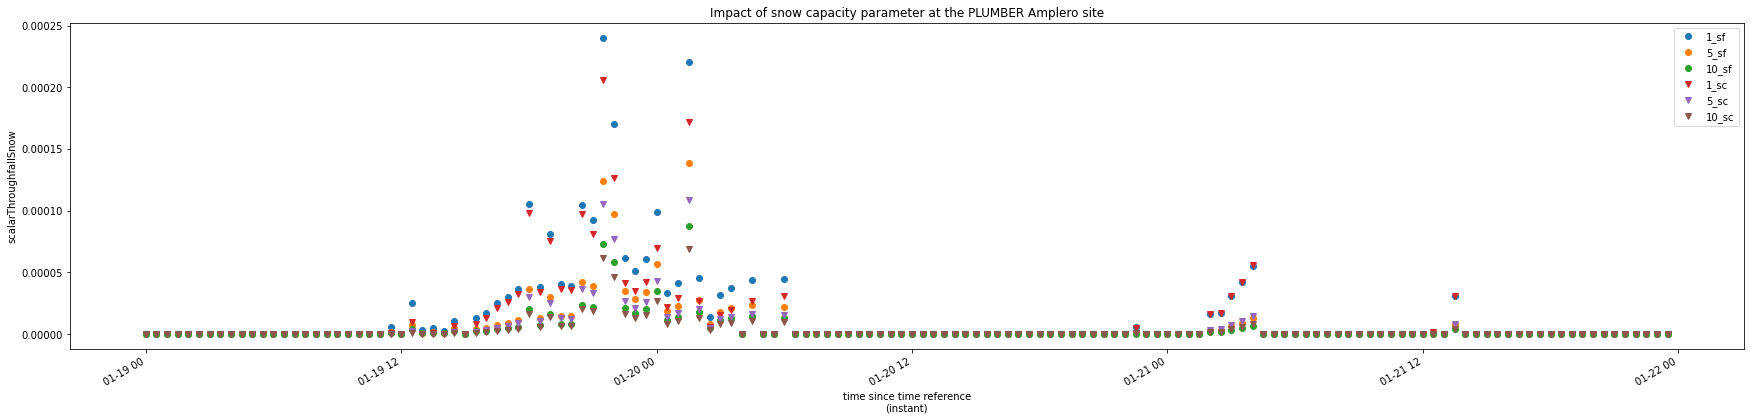

In [107]:
# make the plot
# plt.figure(figsize=(30,6))
# aux_plot_1(output_files,rain_cap_sequence)
# plt.legend()
# plt.title('Impact of rain capacity at the PLUMBER Amplero site')
# plt.ylabel('scalarCanopyEvaporation');

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,labels, p, '2004-1-19', '2004-1-21')
    plt.legend()
    plt.title('Impact of snow capacity parameter and parameterization at the PLUMBER Amplero site')
    plt.set_cmap('viridis')
    plt.ylabel(p + ' (kg m$^{-2}$ s$^{-1}$)');

The sensitivity of the canopy snow capacity parameter has a strong influence on the snowfall throughfall rate for the winter storm shown above. We can also see that as the canopy fills with snow that there is a greater range between the sparseCanopy and storageFunc parameterizations. There is no effect of the canopy snow storage capacity on the throughfall rate for rain. 

<br>
<br>

## Exercise 3: Below canopy wind profile 
The choice of vertical wind profile affects the simulated sensible and latent heat fluxes. This modelling decision is called `windPrfile` in the SUMMA decision file. It has two options, `exponential` and `logBelowCanopy`, where the `exponential` profile also relies on a parameter that describes the decline in wind speed:

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| windReductionParam        |       0.2800 |       0.0000 |       1.0000 | - | canopy wind reduction parameter

Use your knowledge of pysumma to:

- Run the simulations for your PLUMBER site with both profiles
- Re-run your simulations with the exponential wind profile several times with different values for the wind reduction parameter
- Make a graph to show the differences between the two wind profiles and the impact of the `windReductionParam` parameter. You can look at variables such as sensible heat (`scalarSenHeatTotal`) and surface temperature (`scalarSurfaceTemp`)

### Run the simulations using both wind profiles

#### Find out what the available parametrizations for `windPrfile` are

In [108]:
# Find the parametrizations
decision = 'windPrfile'
parametrizations = s_amplero.decisions[decision].available_options.copy()
print(parametrizations)

['exponential', 'logBelowCanopy']


In [109]:
# Do the simulations
for parametrization in parametrizations:
    
    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()
    
    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization )

Setting up simulations with parametrization exponential for windPrfile
Setting up simulations with parametrization logBelowCanopy for windPrfile


In [111]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__windPrfile_logBelowCanopy_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_exponential_timestep.nc']


### Re-run the simulation using several different values for windReductionParam

In [119]:
# Find the default parameter values

s_amplero.reset()

# Print it
print('old: ' + str(s_amplero.global_hru_params['windReductionParam']))

# create a sequence of parameter values to loop through for the exponential parameterization 
wind_reduct_sequence = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# test changing param 
s_amplero.global_hru_params['windReductionParam'] = 0.9999

print('new: ' + str(s_amplero.global_hru_params['windReductionParam']))

s_amplero.reset()

print('reset: ' + str(s_amplero.global_hru_params['windReductionParam']))

old: windReductionParam        |       0.2800 |       0.0000 |       1.0000
new: windReductionParam        |       0.9999 |       0.9999 |       0.9999
reset: windReductionParam        |       0.2800 |       0.0000 |       1.0000


In [122]:
# Do the simulations changing only the wind capacity parameter 

parametrization = 'exponential'

for wind_reduct_parameter in wind_reduct_sequence:
    # reset the simulation
    s_amplero.reset()
    
    s_amplero.global_hru_params['windReductionParam'] = wind_reduct_parameter
    print('new: ' + str(s_amplero.global_hru_params['windReductionParam']))

    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' and wind reduct parameter ' + str(wind_reduct_parameter) + ' for ' + decision)

    # Set the model decision
    s_amplero.decisions[decision] = parametrization

    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization + '_' + 'wind_par' + str(wind_reduct_parameter))

new: windReductionParam        |       0.0000 |       0.0000 |       0.0000
Setting up simulations with parametrization exponential and wind reduct parameter 0.0 for windPrfile
new: windReductionParam        |       0.2000 |       0.2000 |       0.2000
Setting up simulations with parametrization exponential and wind reduct parameter 0.2 for windPrfile
new: windReductionParam        |       0.4000 |       0.4000 |       0.4000
Setting up simulations with parametrization exponential and wind reduct parameter 0.4 for windPrfile
new: windReductionParam        |       0.6000 |       0.6000 |       0.6000
Setting up simulations with parametrization exponential and wind reduct parameter 0.6 for windPrfile
new: windReductionParam        |       0.8000 |       0.8000 |       0.8000
Setting up simulations with parametrization exponential and wind reduct parameter 0.8 for windPrfile
new: windReductionParam        |       1.0000 |       1.0000 |       1.0000
Setting up simulations with parametriza

### Make a graph to show the difference between the two wind profiles and the parameter sensitivity

In [28]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__windPrfile_exponential_wind_par0.2_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_exponential_wind_par0.4_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_exponential_wind_par0.6_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_exponential_wind_par0.8_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_exponential_wind_par1.0_timestep.nc',
    './output/plumber/Amplero/Amplero__windPrfile_logBelowCanopy_timestep.nc']


# output_files = [
#     './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par0.26_timestep.nc',
#         './output/plumber/Amplero/Amplero__cIntercept_sparseCanopy_rain_par1.0_timestep.nc']

labels = ['0.2_exp', 
          '0.4_exp', 
          '0.6_exp', 
          '0.8_exp', 
          '1.0_exp', 
          'logBelowCanopy']

select_params = ['scalarSenHeatTotal', 'scalarSurfaceTemp']


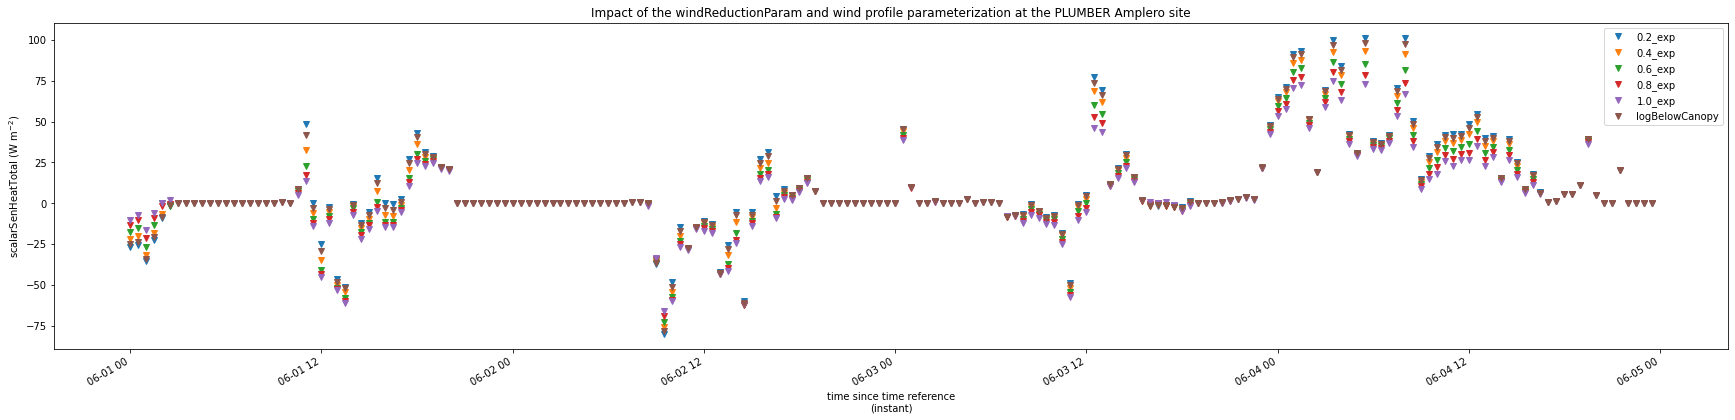

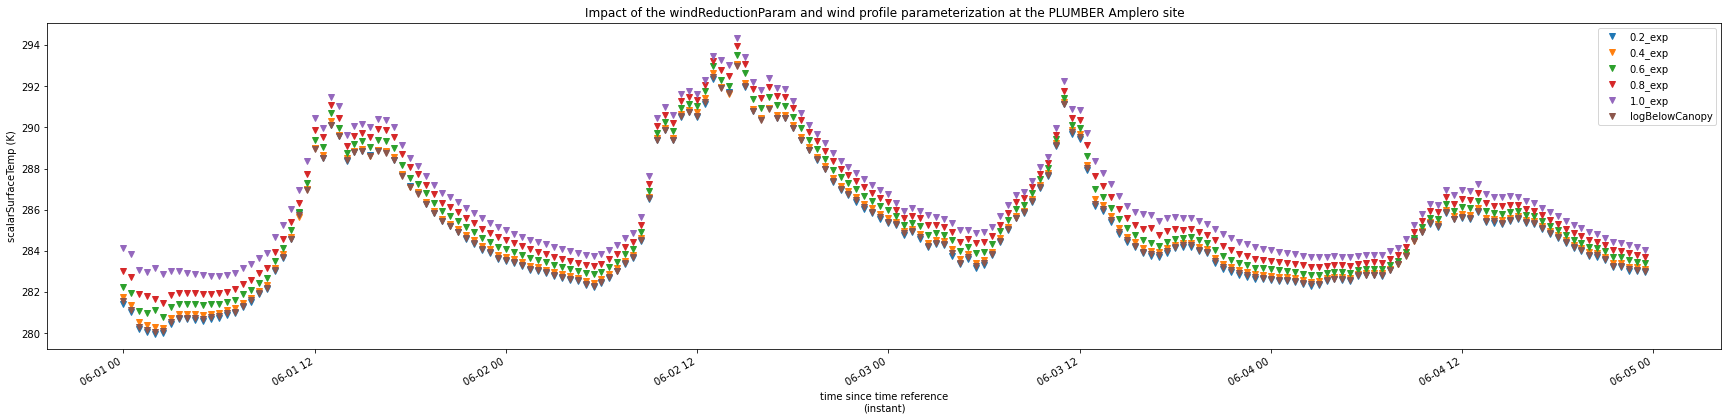

In [30]:
# make the plot
# plt.figure(figsize=(30,6))
# aux_plot_1(output_files,rain_cap_sequence)
# plt.legend()
# plt.title('Impact of rain capacity at the PLUMBER Amplero site')
# plt.ylabel('scalarCanopyEvaporation');

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,labels, p, '2004-6-1', '2004-6-4')
    plt.legend()
    plt.title('Impact of the windReductionParam and wind profile parameterization at the PLUMBER Amplero site')

    if p == 'scalarSenHeatTotal':
        unit = ' (W m$^{-2}$)'
    else:
        unit = ' (K)'

    plt.ylabel(p + unit);

the default exponential wind profile parameter of 0.26 appears to be nearly identical to the logBelowCanopy parameterization. changing the parameter higher leads to lower sensible heat flux and higher surface temperature.

<br>
<br>

## Exercise 4: Vegetation properties
Canopy interception is partly determined by the specified Leaf Area Index (LAI) and Stem Area Index (SAI). SUMMA has two modelling options available as part of decision `LAI_method`: `monTable` and `specified`. `monTable` uses a lookup table to find LAI values, the choice of which is specified in the `vegeParTbl` modelling decision. Option `specified` instead uses parameter `summerLai` and `winterSAI` values from the global GRU parameter file. For now, we'll focus on the choice of lookup table only.

Prof. Clark has created three PLUMBER-specific lookup tables for this vegetation phenology experiment. These bear the names `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` respectively, where the `plumberSUMMA` table is identical to the default PLUMBER setup we generated at the beginning of this assignment. 

For this exericse, use your knowledge of pysumma to:
- Generate simulations for one of the PLUMBER sites with each of the three phenology options specified above
- Make graphs to show the differences in simulated evaporation (`scalarCanopyEvaporation`) and transpiration (`scalarCanopyTranspiration`), and the difference in simulated throughfall of rain (`scalarThroughfallRain`) and snow (`scalarThroughfallSnow`). Comment on what you see

#### NOTE
Due to the experiment-specific nature of the `plumberCABLE`, `plumberCHTESSEL`, and `plumberSUMMA` lookup tables, some remapping of the `vegTypeIndex` parameter is needed. Detailed explanations are beyond the scope of this assignment. Use the code provided below to do the required remapping. To avoid confusion, your code must include:
- a line to change the `vegeParTbl` modelling decision to be one of `plumberCABLE`, `plumberCHTESSEL`, or `plumberSUMMA`
- a line that calls the remap function for your chosen site, e.g. `remap_vegTypeIndex_to_siteIndex(s_amplero,'Amplero')`

You can check if the remapping has been performed correctly by calling `s_amplero.local_attributes['vegTypeIndex'].data[0]` before you run your model simulation. The value returned must match the value in the code below, e.g. for the Amplero site you should see `1`, for Blodgett you should see `2`, etc.

Note that if you reset your simulation object (`s_amplero.reset()`), this will reset __both__ the modelling decision __and__ the remapping. 

In [134]:
# remapping of the `vegTypeIndex` parameter
def remap_vegTypeIndex_to_siteIndex(simulationObject,site):
    
    # Indices of all sites in the `VEGPARM.TBL` and `MPTABLE.TBL` files, for the PLUMBER-specific lookup tables
    siteIndex = {'Amplero':  1,
                'Blodgett':  2,
                'Bugac':     3,
                'ElSaler':   4,
                'ElSaler2':  5,
                'Espirra':   6,
                'FortPeck':  7,
                'Harvard':   8,
                'Hesse':     9,
                'Howard':   10,
                'Howlandm': 11,
                'Hyytiala': 12,
                'Kruger':   13,
                'Loobos':   14,
                'Merbleue': 15,
                'Mopane':   16,
                'Palang':   17,
                'Sylvania': 18,
                'Tumba':    19,
                'UniMich':  20}
    
    # Change the `vegTypeIndex` parameter
    simulationObject.local_attributes['vegTypeIndex'].data[0] = siteIndex[site]
    
    return

### Generate simulations for one of the PLUMBER sites with each of the three phenology options (plumberCABLE, plumberCHTESSEL, plumberSUMMA)

In [135]:
decision = 'vegeParTbl'

parametrizations = s_amplero.decisions[decision].available_options.copy()

print(parametrizations)

parametrizations.remove('USGS')
parametrizations.remove('MODIFIED_IGBP_MODIS_NOAH')

print(parametrizations)

# s_amplero.decisions[decision] = parametrization

['USGS', 'MODIFIED_IGBP_MODIS_NOAH', 'plumberCABLE', 'plumberCHTESSEL', 'plumberSUMMA']
['plumberCABLE', 'plumberCHTESSEL', 'plumberSUMMA']


In [138]:
# Do the simulations changing only the snow capacity parameter and the parameterization

for parametrization in parametrizations:

    # Print what we're doing
    print('Setting up simulations with parametrization ' + parametrization + ' for ' + decision)
    
    # reset the simulation
    s_amplero.reset()

    # Set the model decision
    s_amplero.decisions[decision] = parametrization
    
    # some remapping of the vegTypeIndex parameter is needed. Detailed explanations are beyond the scope of this assignment
    remap_vegTypeIndex_to_siteIndex(s_amplero,'Amplero')
    
    # check the remapping should return 1
    # print(s_amplero.local_attributes['vegTypeIndex'].data[0])

    # Run the model
    s_amplero.run('local', run_suffix=decision + '_' + parametrization )

Setting up simulations with parametrization plumberCABLE for vegeParTbl
Setting up simulations with parametrization plumberCHTESSEL for vegeParTbl
Setting up simulations with parametrization plumberSUMMA for vegeParTbl


### Make graphs to show the differences in simulated evaporation (scalarCanopyEvaporation) and transpiration (scalarCanopyTranspiration), and the difference in simulated throughfall of rain (scalarThroughfallRain) and snow (scalarThroughfallSnow)

In [141]:
# prepare the plot
output_files = [
    './output/plumber/Amplero/Amplero__vegeParTbl_plumberCABLE_timestep.nc',
    './output/plumber/Amplero/Amplero__vegeParTbl_plumberCHTESSEL_timestep.nc',
    './output/plumber/Amplero/Amplero__vegeParTbl_plumberSUMMA_timestep.nc'
]

labels = ['plumberCABLE', 'plumberCHTESSEL', 'plumberSUMMA']

select_params = ['scalarCanopyEvaporation', 'scalarCanopyTranspiration', 'scalarThroughfallRain', 'scalarThroughfallSnow']


### Just look at winter snowfall event first 

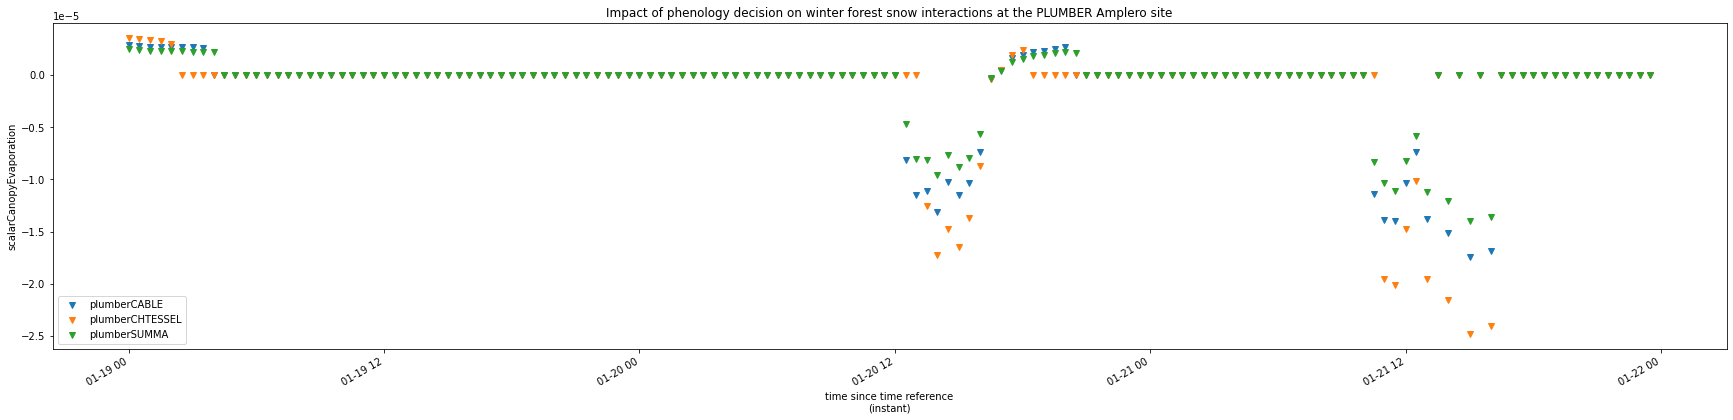

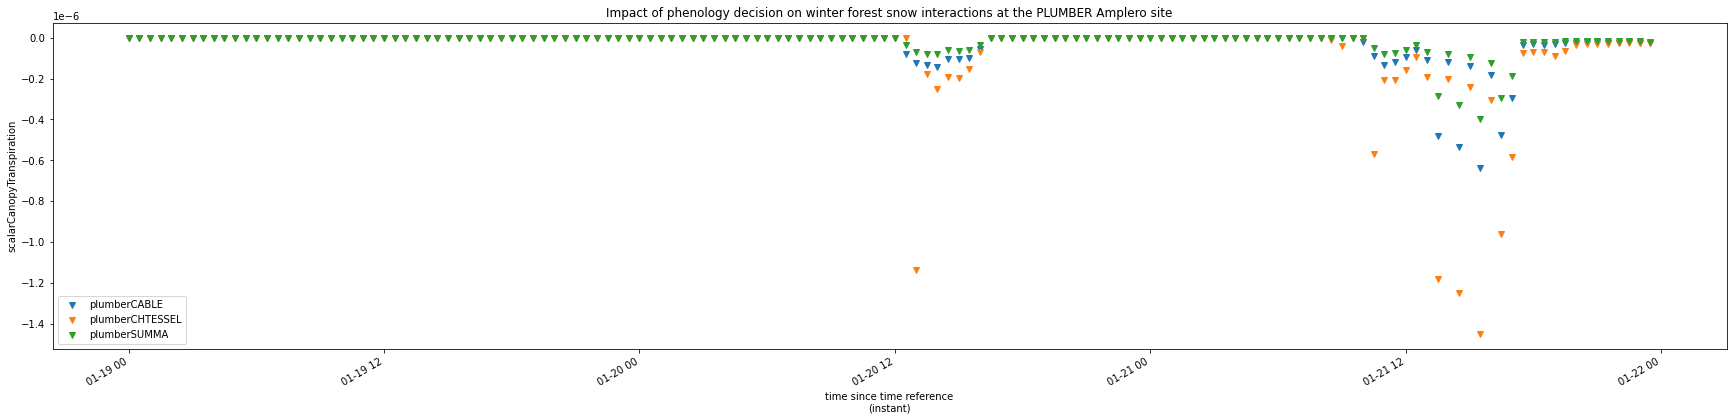

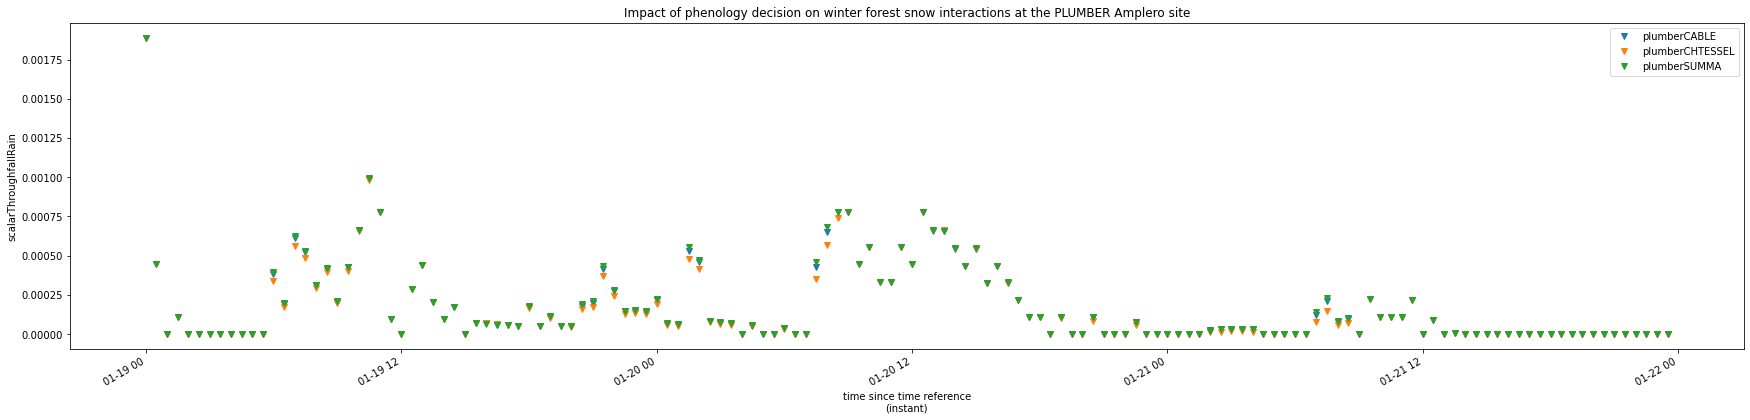

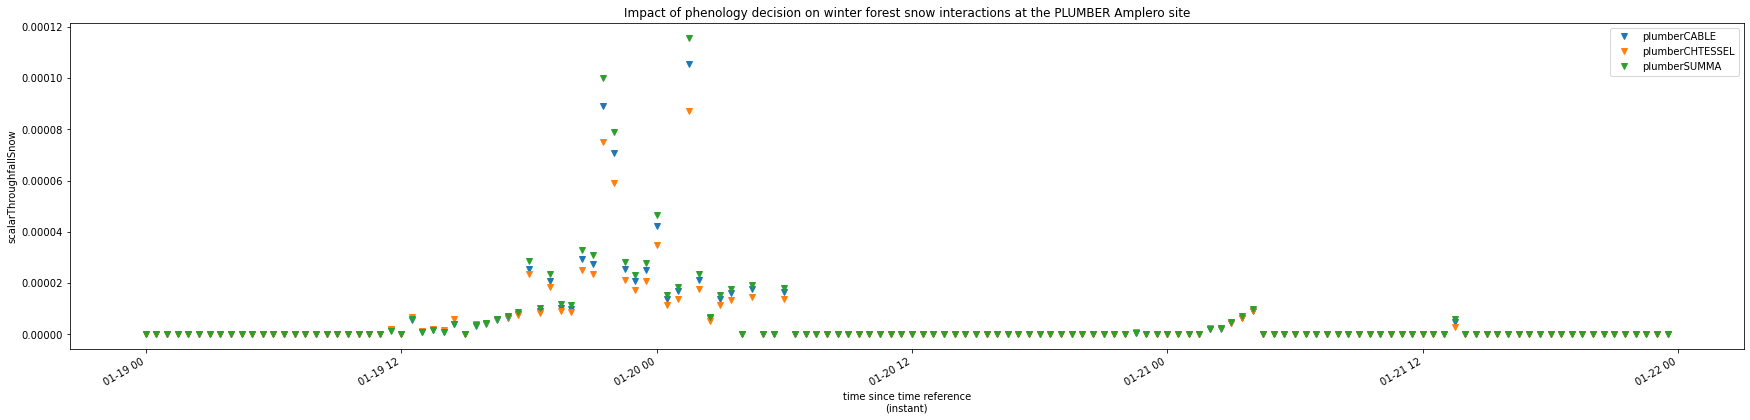

In [144]:
# make the plot
# plt.figure(figsize=(30,6))
# aux_plot_1(output_files,rain_cap_sequence)
# plt.legend()
# plt.title('Impact of rain capacity at the PLUMBER Amplero site')
# plt.ylabel('scalarCanopyEvaporation');

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,labels, p, '2004-1-19', '2004-1-21')
    plt.legend()
    plt.title('Impact of phenology decision on winter forest snow interactions at the PLUMBER Amplero site')
    plt.set_cmap('viridis')
    plt.ylabel(p  + ' (kg m$^{-2}$ s$^{-1}$)');

it appears the plumberCHTESSEL has the highest canopy coverage and results in a lower throughfall rate, plumberCABLE has a slightly higher throughfall rate and thus likely a lower canopy cover, and plumberSUMMA the default appears to have the highest snowfall throughfall rate likely due to the lowest canopy coverage.  

### Just look at summer rainfall event now

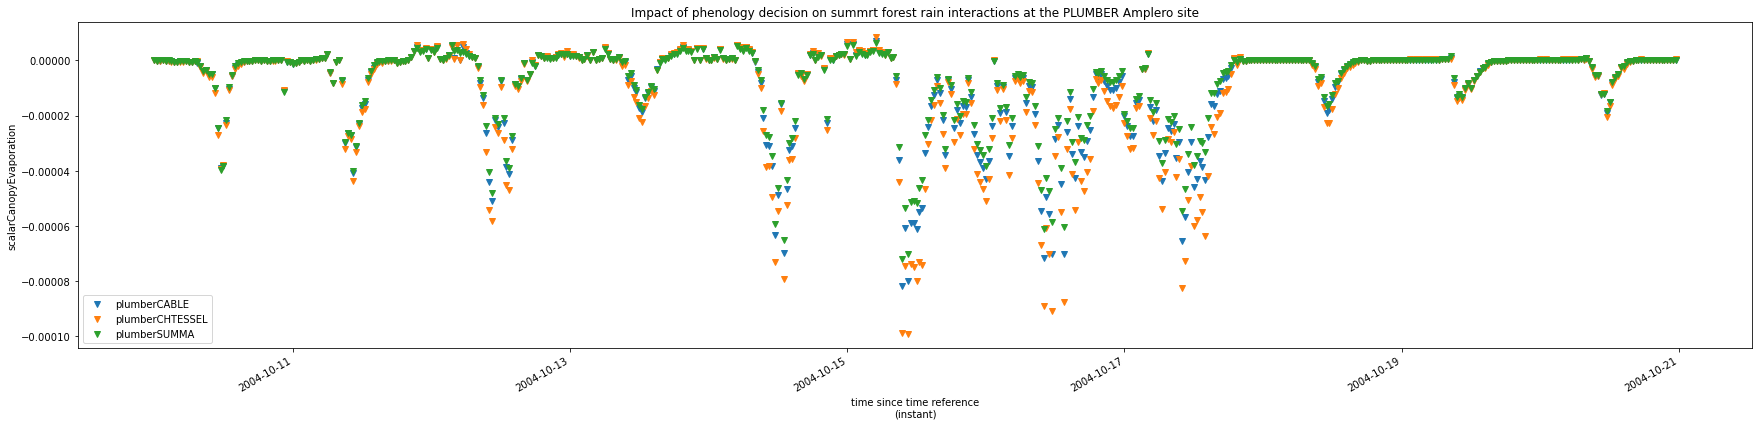

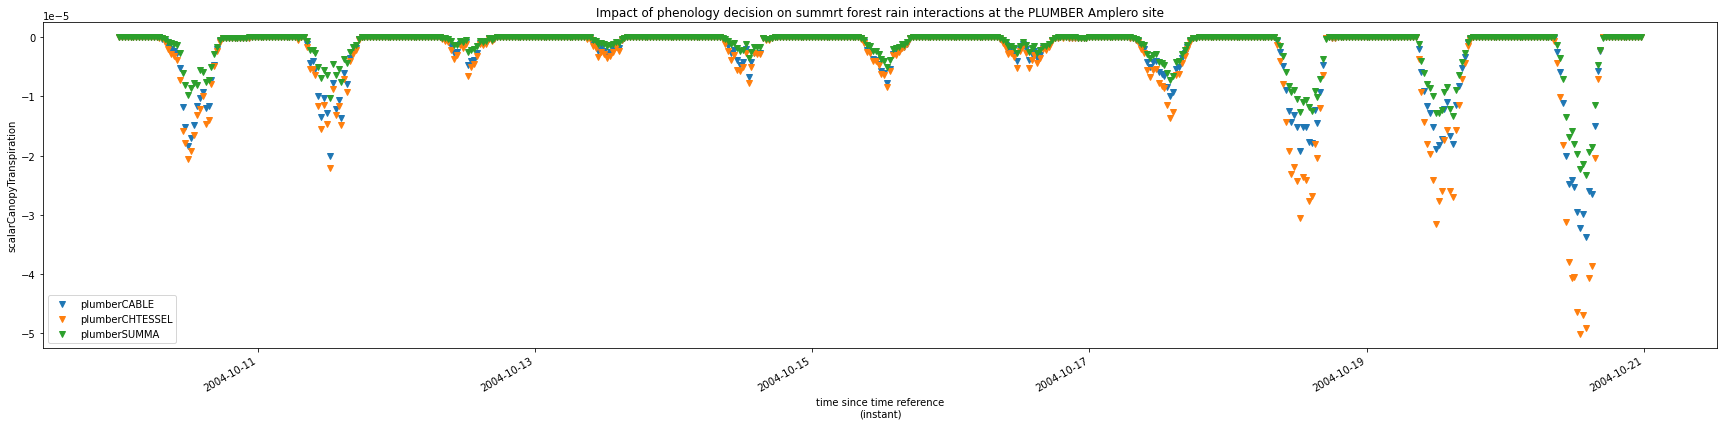

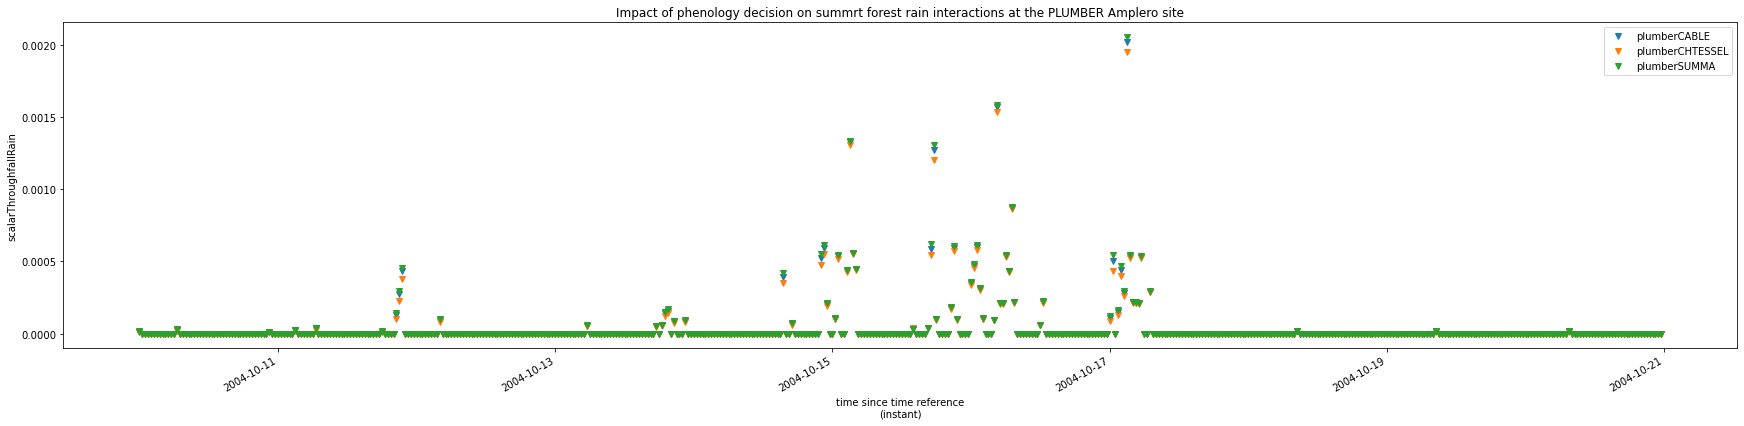

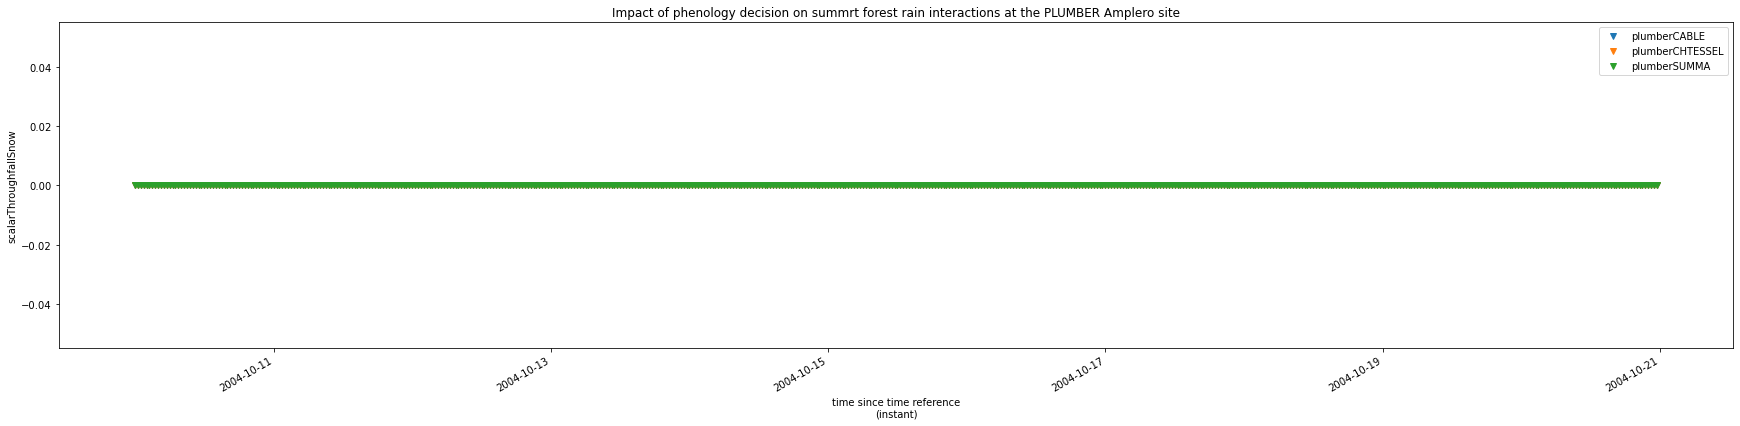

In [146]:
# make the plot
# plt.figure(figsize=(30,6))
# aux_plot_1(output_files,rain_cap_sequence)
# plt.legend()
# plt.title('Impact of rain capacity at the PLUMBER Amplero site')
# plt.ylabel('scalarCanopyEvaporation');

for p in select_params:
    plt.figure(figsize=(30,6))
    aux_plot_1(output_files,labels, p, '2004-10-10', '2004-10-20')
    plt.legend()
    plt.title('Impact of phenology decision on summrt forest rain interactions at the PLUMBER Amplero site')
    plt.set_cmap('viridis')
    plt.ylabel(p + ' (kg m$^{-2}$ s$^{-1}$)');

Again we see the influence of changing the leaf area index and stem area on the liquid water mass and energy balance of the canopy using the three phenology options. The results from this fall rainstorm also confirm CHTESSEL has the highest canopy cover leading to lowest throughfall and higher (absolute) evapotranspiration and evaporation rates, followed by CABLE, and finally the default SUMMA has the lowest canopy cover and highest throughfall and lower evapotranspiration evaporation rates. The sensitivity of the canopy phenology appears to be stronger for the snowfall example leading to a greater range in snowfall throughfall rates and evaporation rates between the three phenologies compared to the rain which has less of a range between the phenology types. Plant transpiration however, is more senstivie for rainfall as we do not expect high transpiration rates during winter due to frozen soil. So depending on where the model is run, in this case Italian grasslands, we may pay more attention to the sensitivity of certain parameters that are likely to be more important such as the low elevation, relatively warm climate of Italy and we would focus on correctly representing these processes.